<a href="https://colab.research.google.com/github/pragnakulkarni/Netflix-Movies-and-TV-Shows/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [325]:
!wget https://raw.githubusercontent.com/pragnakulkarni/Netflix-Movies-and-TV-Shows/main/netflix_titles.csv

--2024-08-07 10:48:30--  https://raw.githubusercontent.com/pragnakulkarni/Netflix-Movies-and-TV-Shows/main/netflix_titles.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix_titles.csv.2’

netflix_titles.csv. 100%[===================>]   3.24M  --.-KB/s    in 0.08s   

2024-08-07 10:48:30 (41.7 MB/s) - ‘netflix_titles.csv.2’ saved [3399671/3399671]



Let's import the required libraries

In [326]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Let's create a Pandas DataFrame for the dataset

In [327]:
netflix_df = pd.read_csv("/content/netflix_titles.csv")
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Datatypes of the dataframe and the individual column

In [328]:
netflix_df.dtypes
netflix_df['date_added'].dtype

dtype('O')

Let's see the number of rows and columns using the shape() function

In [329]:
netflix_df.shape

(8807, 12)

**8807** rows and **12** columns

Let's see for any null values present in the dataframe

In [330]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Dealing with null values in the "director" column

In [331]:
# Let's see how much percentage of director column has null values
missing_proportion = netflix_df['director'].isna().mean() * 100
'''missing_proportion = 29.908027705234474
# since the missing proportion is approximately 30% of the column,
#  so we are not going to drop those null values and are replacing them with the "Unknown" value'''
netflix_df['director'].fillna("Unknown", inplace = True)

Dealing with null values in the cast column

In [332]:
# Let's see how much percentage of cast column has null values
cast_missing = netflix_df['cast'].isnull().mean() * 100
# cast_missing = 9.367548540933349
''' since the missing proportion is approximately 10% of the column,
we are not going to drop those null values and are replacing them with the "Unknown" value'''
netflix_df['cast'].replace(np.NaN,'Unknown', inplace = True)

Dealing with null values in the country column

In [333]:
country_missing = netflix_df['country'].isnull().mean() * 100
# country_missing = 9.435676166685592
'''since the missing portion is approximately 10% of the column,
it is not good idea to drop these null values and we are dealing those null values based on the release year
and mode of the country of that release year'''
# max(netflix_df['release_year'].value_counts())
country_modes = netflix_df.groupby('release_year')['country'].agg(pd.Series.mode)
country_mode_map = country_modes.to_dict()
netflix_df['country'] = netflix_df.apply(lambda row: country_mode_map.get(row['release_year'], row['country'])
                                       if pd.isnull(row['country']) else row['country'], axis=1)

changing the date added format

In [334]:
''' now let's change the format of the column to the datetime format 'yyyy/mm/dd'
so that it will be easy to get information based on the date_added'''
netflix_df['date_added'] = netflix_df['date_added'].astype(str)
netflix_df['date_added'] = netflix_df['date_added'].str.strip()
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='%B %d, %Y', errors='coerce')

Dealing with the null values in 'date_added' column

In [335]:
netflix_df['date_added'].isnull().sum()
missing_dates = netflix_df['date_added'].isnull().mean() * 100
# missing_dates = 0.11354604292040424
'''since the missing dates percentage is 0.1% which is very low and negligible
 so we can delete those null rows'''
netflix_df.dropna(subset = ['date_added'], inplace = True)

Dealing with null values in the rating column

In [336]:
missing_rating = netflix_df['rating'].isnull().mean() * 100
# missing_rating = 0.04547004660679777
'''since the missing rating values percentage is very less we are going to delete the null rows'''
netflix_df.dropna(subset = ['rating'],inplace = True)

Dealing with null values in duration column

In [337]:
misssing_duration = netflix_df['duration'].isnull().mean() * 100
# misssing_duration = 0.0341180484476288
'''since the missing duration values percentage is very less we are going to delete the null rows'''
netflix_df.dropna(subset = ['duration'],inplace = True)

In [338]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now we have cleaned the dataset and is ready for the analysis

Analyse the content distribution of netflix (Movies or TV shows)

In [339]:
content_type = pd.DataFrame(netflix_df['type'].value_counts()).reset_index()
print(content_type)

      type  count
0    Movie   6126
1  TV Show   2664


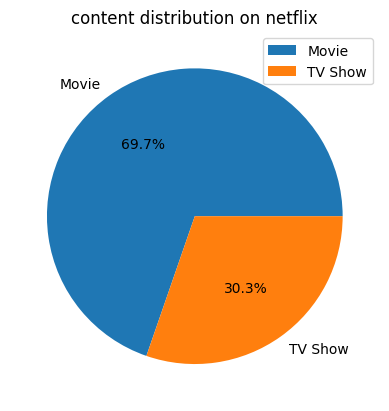

In [340]:
plt.pie(content_type['count'], labels = content_type['type'], autopct='%1.1f%%')
plt.title('content distribution on netflix')
plt.legend(content_type['type'], loc = 'best')

Netflix has more **movies** than TV shows

**Analysing the Directors**

In [341]:
all_directors = netflix_df['director'].str.split(',', expand = True).stack()
all_directors = all_directors.to_frame()
all_directors.columns = ['director']
all_directors['director'] = all_directors['director'].str.strip()
all_directors = all_directors.groupby('director').size().reset_index(name = 'total_count')
all_directors

,director,total_count
0,A. L. Vijay,2
1,A. Raajdheep,1
2,A. Salaam,1
3,A.R. Murugadoss,2
4,Aadish Keluskar,1
...,...,...
4987,Éric Warin,1
4988,Ísold Uggadóttir,1
4989,Óskar Thór Axelsson,1
4990,Ömer Faruk Sorak,3


In [342]:
known_directors = all_directors.loc[all_directors['director'] != 'Unknown']
known_directors

,director,total_count
0,A. L. Vijay,2
1,A. Raajdheep,1
2,A. Salaam,1
3,A.R. Murugadoss,2
4,Aadish Keluskar,1
...,...,...
4987,Éric Warin,1
4988,Ísold Uggadóttir,1
4989,Óskar Thór Axelsson,1
4990,Ömer Faruk Sorak,3


In [343]:
#sorting the known directors based on the total_count
known_directors = known_directors.sort_values(by = 'total_count', ascending = False)
known_directors

,director,total_count
3747,Rajiv Chilaka,22
1905,Jan Suter,21
3798,Raúl Campos,19
2864,Marcus Raboy,16
4455,Suhas Kadav,16
...,...,...
2292,Jovanka Vuckovic,1
634,Brandon Camp,1
2294,Juan Antin,1
2295,Juan Antonio de la Riva,1


**Top 10 Directors of the Netflix**

In [344]:
top10Directors = known_directors.head(10)
top10Directors

,director,total_count
3747,Rajiv Chilaka,22
1905,Jan Suter,21
3798,Raúl Campos,19
2864,Marcus Raboy,16
4455,Suhas Kadav,16
1953,Jay Karas,15
754,Cathy Garcia-Molina,13
2943,Martin Scorsese,12
1950,Jay Chapman,12
4940,Youssef Chahine,12


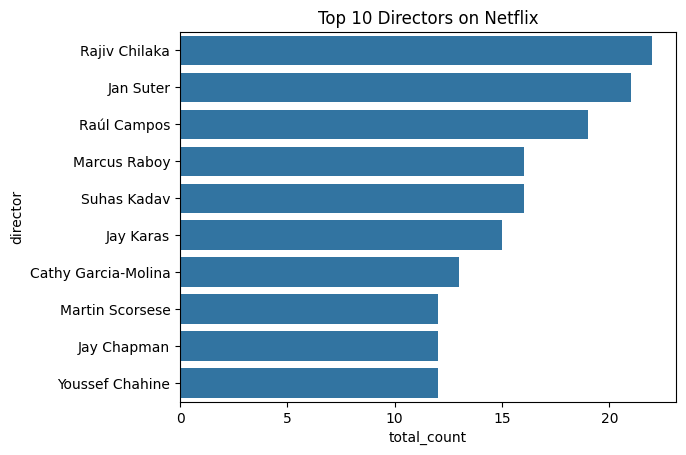

In [345]:
sns.barplot(data = top10Directors, x = top10Directors['total_count'], y = top10Directors['director'], orient = 'h')
plt.title('Top 10 Directors on Netflix', loc = 'center', pad = 6.0)
plt.show()


**Analysing the cast**

In [346]:
all_actors = netflix_df['cast'].str.split(',',expand = True).stack()
all_actors = all_actors.to_frame()
all_actors.columns = ['actor']
all_actors['actor'] = all_actors['actor'].str.strip()
all_actors = all_actors.groupby(['actor']).size().reset_index(name = 'film_count')
all_actors

,actor,film_count
0,"""Riley"" Lakdhar Dridi",1
1,'Najite Dede,2
2,2 Chainz,1
3,2Mex,1
4,4Minute,1
...,...,...
36388,Şevket Çoruh,1
36389,Şinasi Yurtsever,3
36390,Şükran Ovalı,1
36391,Şükrü Özyıldız,2


In the above block of code we have retrieved the film count(movie or TV show) of an each actor on the netflix. Now let us sort them in the descending order of their film count to take the top 10 actors of netflix

In [347]:
#Lets exclude the unknown cast category from the column
known_actors = all_actors.loc[all_actors['actor'] != 'Unknown']
known_actors

,actor,film_count
0,"""Riley"" Lakdhar Dridi",1
1,'Najite Dede,2
2,2 Chainz,1
3,2Mex,1
4,4Minute,1
...,...,...
36388,Şevket Çoruh,1
36389,Şinasi Yurtsever,3
36390,Şükran Ovalı,1
36391,Şükrü Özyıldız,2


In [348]:
known_actors = known_actors.sort_values(by = 'film_count', ascending = False)
known_actors

,actor,film_count
2825,Anupam Kher,43
30448,Shah Rukh Khan,35
16672,Julie Tejwani,33
24182,Naseeruddin Shah,32
32548,Takahiro Sakurai,32
...,...,...
14204,Jamie Luk,1
14203,Jamie Lissow,1
14202,Jamie Lever,1
14200,Jamie Lee,1


**Top 10 actors of Netflix**

In [349]:
top_10_actors = known_actors.head(10)
top_10_actors

,actor,film_count
2825,Anupam Kher,43
30448,Shah Rukh Khan,35
16672,Julie Tejwani,33
24182,Naseeruddin Shah,32
32548,Takahiro Sakurai,32
28933,Rupa Bhimani,31
845,Akshay Kumar,30
25388,Om Puri,30
35835,Yuki Kaji,29
25745,Paresh Rawal,28


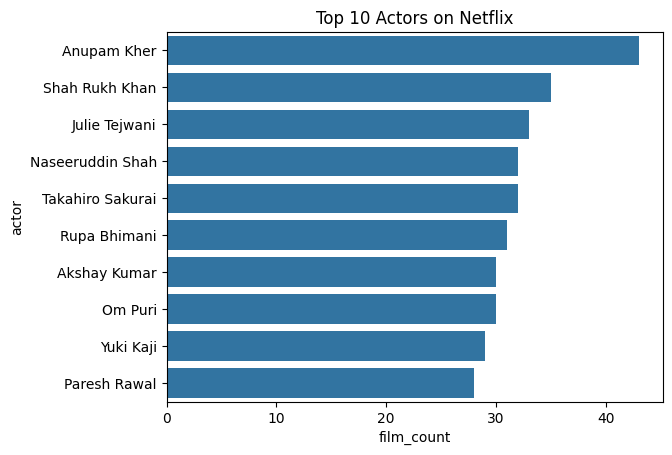

In [350]:
sns.barplot(data = top_10_actors, x = 'film_count', y = 'actor', orient = 'h')
plt.title('Top 10 Actors on Netflix')
plt.show()

**Analysing the country column**

In [351]:
all_countries = netflix_df['country'].str.split(',',expand = True).stack()
all_countries =all_countries.to_frame()
all_countries.columns = ['country']
all_countries['country'] = all_countries['country'].str.strip()
all_countries = all_countries.groupby('country').size().reset_index(name = 'country_count')
all_countries

,country,country_count
0,,7
1,Afghanistan,1
2,Albania,1
3,Algeria,3
4,Angola,1
...,...,...
118,Vatican City,1
119,Venezuela,4
120,Vietnam,7
121,West Germany,5


In [352]:
all_countries = all_countries.sort_values(by = 'country_count', ascending = False)
all_countries

,country,country_count
116,United States,4505
46,India,1049
115,United Kingdom,805
21,Canada,445
37,France,393
...,...,...
53,Jamaica,1
97,Slovakia,1
77,Nicaragua,1
35,Ethiopia,1


Top 10 countries that publieshed more on Netflix

In [353]:
top_10_countries = all_countries.head(10)
top_10_countries

,country,country_count
116,United States,4505
46,India,1049
115,United Kingdom,805
21,Canada,445
37,France,393
54,Japan,316
103,Spain,232
101,South Korea,231
39,Germany,226
68,Mexico,169


Text(0.5, 1.0, 'Top 10 countries releainf films on Netflix')

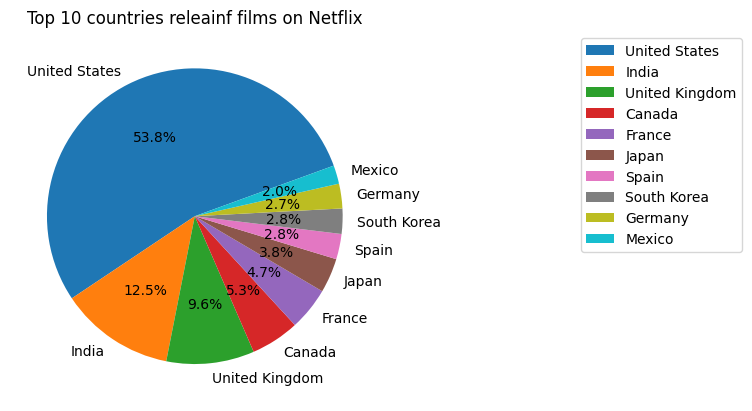

In [354]:
plt.pie(top_10_countries['country_count'], labels = top_10_countries['country'], autopct = '%1.1f%%', startangle=20)
plt.legend(top_10_countries['country'], loc = 'upper right', bbox_to_anchor = [1,0,1,1])
plt.title('Top 10 countries releainf films on Netflix')

More percent of films on Netflix were from **"United States"**

**Analyzing how many movies were added to the Netflix each year**

In [355]:
films_in_year = netflix_df['date_added'].dt.year.to_frame()
films_in_year = films_in_year.groupby(films_in_year['date_added']).size().reset_index(name = 'film_count_in_year')
films_in_year.rename(columns = {'date_added' :'year','film_count_in_year':'film_count_in_year'}, inplace = True)
films_in_year
# Here we have known how many films were added to the netflix in each year

,year,film_count_in_year
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,426
9,2017,1185


In [356]:
# Here let us sort the "films_in_year" dataframe to know the
# top 5 years in which most of the films were added to the netflix
films_in_year = films_in_year.sort_values(by = 'film_count_in_year', ascending = False)
films_in_year
# We can say if the more films added to the Netflix in the particular year,
# that means in those years netflix platform was in the trend and is doing good.

,year,film_count_in_year
11,2019,2016
12,2020,1879
10,2018,1648
13,2021,1498
9,2017,1185
8,2016,426
7,2015,82
6,2014,24
3,2011,13
5,2013,11


**Top 5 years in which Netflix was Trending**

In [357]:
top_5_years = films_in_year.head()
top_5_years

,year,film_count_in_year
11,2019,2016
12,2020,1879
10,2018,1648
13,2021,1498
9,2017,1185


Text(0.5, 1.0, 'Top 5 years in which Netflix was Trending')

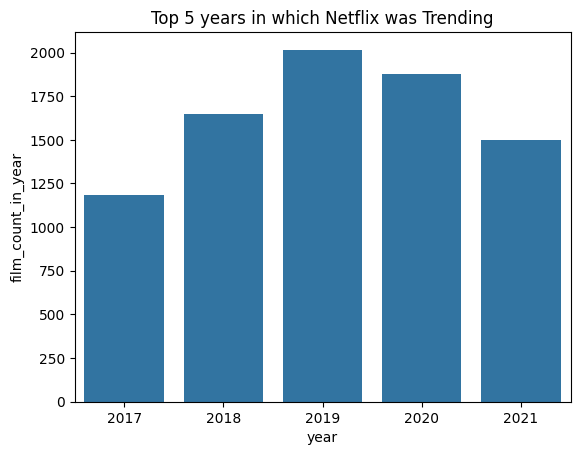

In [358]:
sns.barplot(data = top_5_years,x = 'year', y = 'film_count_in_year')
plt.title('Top 5 years in which Netflix was Trending')

Let's see which is the favourable month on Netflix to add the film i.e the films added based on the month

In [359]:
films_in_month = pd.DataFrame(netflix_df['date_added'].dt.strftime('%B').value_counts()).reset_index()
films_in_month.columns = ['month','films_added']
films_in_month = films_in_month.sort_values(by = 'films_added', ascending = False)
films_in_month

,month,films_added
0,July,827
1,December,812
2,September,769
3,April,763
4,October,760
5,August,754
6,March,741
7,January,737
8,June,728
9,November,705


**Peak months of the Netflix**

These are the peak months of the Netflix to add the films.
We can conclude July is the best month to add films to the Netflix

In [360]:
top_5_months = films_in_month.head()
top_5_months

,month,films_added
0,July,827
1,December,812
2,September,769
3,April,763
4,October,760


Text(0.5, 1.0, 'Top 5 peak months of Netflix')

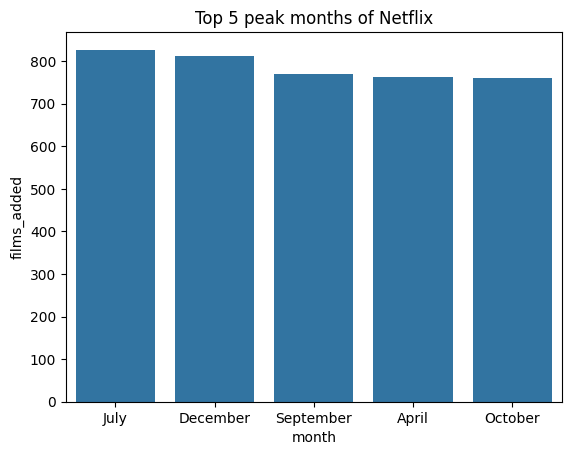

In [361]:
sns.barplot(data = top_5_months,x = 'month', y = 'films_added')
plt.title('Top 5 peak months of Netflix')

" rating in this dataframe indicate the suitability of content for different audiences based on age and content maturity."

**Analysing the Content Rating**

In [362]:
content_rating = pd.DataFrame(netflix_df['rating'].value_counts()).reset_index()
content_rating

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


In [363]:
fig = px.pie(content_rating, values='count', names='rating', title='Content Rating Distribution')
fig.show()

**Analysing genres on Netflix**

In [364]:
genres = netflix_df['listed_in'].str.split(',', expand = True).stack()
genres = genres.to_frame()
genres.columns = ['genre']
genres['genre'] = genres['genre'].str.strip()
genres = genres.groupby('genre').size().reset_index(name = 'count')
genres

,genre,count
0,Action & Adventure,859
1,Anime Features,71
2,Anime Series,174
3,British TV Shows,252
4,Children & Family Movies,641
5,Classic & Cult TV,26
6,Classic Movies,116
7,Comedies,1674
8,Crime TV Shows,469
9,Cult Movies,71


In [365]:
genres = genres.sort_values(by = 'count', ascending = False)
genres

,genre,count
16,International Movies,2752
12,Dramas,2426
7,Comedies,1674
17,International TV Shows,1349
10,Documentaries,869
0,Action & Adventure,859
34,TV Dramas,762
15,Independent Movies,756
4,Children & Family Movies,641
24,Romantic Movies,616


In [366]:
top_10_genres = genres.head(10)
top_10_genres
# Here are the top 10 genres of Netflix

,genre,count
16,International Movies,2752
12,Dramas,2426
7,Comedies,1674
17,International TV Shows,1349
10,Documentaries,869
0,Action & Adventure,859
34,TV Dramas,762
15,Independent Movies,756
4,Children & Family Movies,641
24,Romantic Movies,616


**Distribution of top 10 genres on Netflix**

In [367]:
pie = px.pie(top_10_genres, values = 'count', names = 'genre', title = 'Distribution of top 10 genres on Netflix')
pie.show()

Duration column has 2 different types of values. For movies duration is in minutes and for TV Shows duration is in seasons. So, we are going analyse duration separately for movies and the TV shows

**Analysing Movies Duration**

In [368]:
movies = netflix_df.loc[(netflix_df['type'] == 'Movie')]
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [369]:
def clean_duration(duration):
    if 'min' in duration:
        return duration.replace(' min', '')
    return duration
movies.loc[:, 'duration'] = movies['duration'].apply(clean_duration)

# Convert the cleaned 'duration' to integer
movies['duration'] = movies['duration'].astype(int)

movies.head()

<ipython-input-369-979b5e4a034e>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...


In [370]:
movies.info()
# this tells that our duration column is cleaned now

<class 'pandas.core.frame.DataFrame'>
Index: 6126 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6126 non-null   object        
 1   type          6126 non-null   object        
 2   title         6126 non-null   object        
 3   director      6126 non-null   object        
 4   cast          6126 non-null   object        
 5   country       6126 non-null   object        
 6   date_added    6126 non-null   datetime64[ns]
 7   release_year  6126 non-null   int64         
 8   rating        6126 non-null   object        
 9   duration      6126 non-null   int64         
 10  listed_in     6126 non-null   object        
 11  description   6126 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 622.2+ KB


In [371]:
# movies['duration'] = movies['duration'].str.strip()
# movies['duration'] = movies['duration'].astype(int)
# movies.describe()
#we converted the duration column to integer datatype

**Shortest Duration Movie on Netflix**

In [372]:
shortest_movie = movies.loc[(movies['duration'] == min(movies['duration']))]
shortest_movie
#shortest movie has the duration of 3 min

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",Unknown,United States,2019-06-04,2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ..."


**Longest Duration Movie on Netflix**

In [373]:
longest_movie = movies.loc[(movies['duration'] == max(movies['duration']))]
longest_movie
#Longest movie has the duration of 312 minutes

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,Unknown,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,2018-12-28,2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


**Longest Duration Movies on Netflix**

In [374]:
# Here I am considering the longest movies which has the duration more than 180 minutes i.e 3 hours

longest_movies = movies.loc[movies['duration'] > 180]
longest_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,2021-09-14,2018,TV-MA,182,"Dramas, International Movies",When a powerful businesswoman’s political ambi...
166,s167,Movie,Once Upon a Time in America,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States",2021-09-01,1984,R,229,"Classic Movies, Dramas",Director Sergio Leone's sprawling crime epic f...
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,2021-08-01,1999,R,189,"Dramas, Independent Movies","Through chance, history and divine interventio..."
717,s718,Movie,Headspace: Unwind Your Mind,Unknown,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",United States,2021-06-15,2021,TV-G,273,Documentaries,"Do you want to relax, meditate or sleep deeply..."
806,s807,Movie,Seven Souls in the Skull Castle: Season Moon J...,Hidenori Inoue,"Sota Fukushi, Taichi Saotome, Shohei Miura, Ke...",United States,2021-06-02,2017,TV-14,204,"Action & Adventure, Dramas, International Movies","Japan, 1590. Wandering samurai band together t..."
807,s808,Movie,Seven Souls in the Skull Castle: Season Moon K...,Hidenori Inoue,"Mamoru Miyano, Hiroki Suzuki, Tomoki Hirose, R...",United States,2021-06-02,2017,TV-PG,212,"Action & Adventure, Dramas, International Movies","Japan, 1590. Wandering samurai band together t..."
1019,s1020,Movie,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...","India, United Kingdom",2021-04-17,2001,PG,224,"Dramas, International Movies, Music & Musicals","In 1890s India, an arrogant British commander ..."
1130,s1131,Movie,Seven Souls in the Skull Castle: Season Bird,Hidenori Inoue,"Sadao Abe, Mirai Moriyama, Taichi Saotome, Yas...",United States,2021-04-01,2017,TV-14,182,"Action & Adventure, Dramas, International Movies","Japan, 1590. Wandering samurai band together t..."
1131,s1132,Movie,Seven Souls in the Skull Castle: Season Flower,Hidenori Inoue,"Shun Oguri, Koji Yamamoto, Songha, Ryo, Muneta...",Japan,2021-04-01,2017,TV-14,181,"Action & Adventure, Dramas, International Movies","Japan, 1590. Wandering samurai band together t..."
1132,s1133,Movie,Seven Souls in the Skull Castle: Season Wind,Hidenori Inoue,"Kenichi Matsuyama, Osamu Mukai, Rena Tanaka, J...",United States,2021-04-01,2017,TV-14,185,"Action & Adventure, Dramas, International Movies","Japan, 1590. Wandering samurai band together t..."


**Top 10 Longest Duration Movies on Netflix**

In [375]:
top_10_longest_movies = longest_movies.head(10)
top_10_longest_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,2021-09-14,2018,TV-MA,182,"Dramas, International Movies",When a powerful businesswoman’s political ambi...
166,s167,Movie,Once Upon a Time in America,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States",2021-09-01,1984,R,229,"Classic Movies, Dramas",Director Sergio Leone's sprawling crime epic f...
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,2021-08-01,1999,R,189,"Dramas, Independent Movies","Through chance, history and divine interventio..."
717,s718,Movie,Headspace: Unwind Your Mind,Unknown,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",United States,2021-06-15,2021,TV-G,273,Documentaries,"Do you want to relax, meditate or sleep deeply..."
806,s807,Movie,Seven Souls in the Skull Castle: Season Moon J...,Hidenori Inoue,"Sota Fukushi, Taichi Saotome, Shohei Miura, Ke...",United States,2021-06-02,2017,TV-14,204,"Action & Adventure, Dramas, International Movies","Japan, 1590. Wandering samurai band together t..."
807,s808,Movie,Seven Souls in the Skull Castle: Season Moon K...,Hidenori Inoue,"Mamoru Miyano, Hiroki Suzuki, Tomoki Hirose, R...",United States,2021-06-02,2017,TV-PG,212,"Action & Adventure, Dramas, International Movies","Japan, 1590. Wandering samurai band together t..."
1019,s1020,Movie,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...","India, United Kingdom",2021-04-17,2001,PG,224,"Dramas, International Movies, Music & Musicals","In 1890s India, an arrogant British commander ..."
1130,s1131,Movie,Seven Souls in the Skull Castle: Season Bird,Hidenori Inoue,"Sadao Abe, Mirai Moriyama, Taichi Saotome, Yas...",United States,2021-04-01,2017,TV-14,182,"Action & Adventure, Dramas, International Movies","Japan, 1590. Wandering samurai band together t..."
1131,s1132,Movie,Seven Souls in the Skull Castle: Season Flower,Hidenori Inoue,"Shun Oguri, Koji Yamamoto, Songha, Ryo, Muneta...",Japan,2021-04-01,2017,TV-14,181,"Action & Adventure, Dramas, International Movies","Japan, 1590. Wandering samurai band together t..."
1132,s1133,Movie,Seven Souls in the Skull Castle: Season Wind,Hidenori Inoue,"Kenichi Matsuyama, Osamu Mukai, Rena Tanaka, J...",United States,2021-04-01,2017,TV-14,185,"Action & Adventure, Dramas, International Movies","Japan, 1590. Wandering samurai band together t..."


**Analysing Shows duration**

In [376]:
shows = netflix_df.loc[(netflix_df['type'] == 'TV Show')]
shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [380]:
shows.loc[:,'duration'] = shows['duration'].apply( lambda d : d.replace(" Season","").replace("s","") if "Season" in d else d)
shows['duration'] = shows['duration'].astype(int)
shows

<ipython-input-380-9f635a7ee411>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [382]:
shows.describe()
shows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2664 entries, 1 to 8803
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       2664 non-null   object        
 1   type          2664 non-null   object        
 2   title         2664 non-null   object        
 3   director      2664 non-null   object        
 4   cast          2664 non-null   object        
 5   country       2664 non-null   object        
 6   date_added    2664 non-null   datetime64[ns]
 7   release_year  2664 non-null   int64         
 8   rating        2664 non-null   object        
 9   duration      2664 non-null   int64         
 10  listed_in     2664 non-null   object        
 11  description   2664 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 270.6+ KB


In [385]:
shows['duration'].value_counts()

duration
1     1791
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
13       2
15       2
12       2
17       1
11       1
Name: count, dtype: int64

**TV Shows with more than 10 seasons**

In [387]:
longest_season_shows = shows.loc[shows['duration'] >= 10]
longest_season_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
390,s391,TV Show,The Walking Dead,Unknown,"Andrew Lincoln, Steven Yeun, Norman Reedus, Ch...",United States,2021-07-26,2019,TV-MA,10,"Classic & Cult TV, TV Action & Adventure, TV D...","In the wake of a zombie apocalypse, survivors ..."
548,s549,TV Show,Grey's Anatomy,Unknown,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
1354,s1355,TV Show,Heartland,Unknown,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,2021-02-01,2019,TV-14,13,TV Dramas,Spunky teenager Amy is reeling from the sudden...
1622,s1623,TV Show,Stargate SG-1,Unknown,"Richard Dean Anderson, Michael Shanks, Amanda ...","United States, Canada",2020-12-01,2006,TV-MA,10,"Classic & Cult TV, TV Action & Adventure, TV S...",Stargate Command roars into action when Jack O...
1759,s1760,TV Show,LEGO Ninjago: Masters of Spinjitzu,Unknown,"Vincent Tong, Jillian Michaels, Ian James Corl...","Denmark, Singapore, Canada, United States",2020-11-01,2019,TV-Y7,10,Kids' TV,"Kai, Jay, Cole and Zane must master their elem..."
2203,s2204,TV Show,Shameless (U.S.),Unknown,"William H. Macy, Emmy Rossum, Justin Chatwin, ...",United States,2020-07-26,2019,TV-MA,10,"TV Comedies, TV Dramas",This dramedy based on a British series centers...
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2020-06-05,2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."
4220,s4221,TV Show,COMEDIANS of the world,Unknown,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,2019-01-01,2019,TV-MA,13,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...
4798,s4799,TV Show,NCIS,Unknown,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,2018-07-01,2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...
4964,s4965,TV Show,Trailer Park Boys,Unknown,"Mike Smith, John Paul Tremblay, Robb Wells, Jo...",Canada,2018-03-30,2018,TV-MA,12,"Classic & Cult TV, Crime TV Shows, Internation...",Follow the booze-fueled misadventures of three...
